In [3]:
%pip install tensorflow_datasets 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 306.9 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.9/230.9 kB 5.2 MB/s eta 0:00:0000:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=85c535dcaf3195d4f59b90258368aebfea465f5f2e59fc48aa0946e4dfa502a3
  Stored in directory: /Users/sergiogonzalez/Library/Caches/pip/wheels/90/74/b1/9b54c896b8d9409e9268329d4d45ede8a8040abe91c8879932
Successfully built promise
  Attempting uninstall: protobuf
    Found existing in

In [1]:
from sklearn.model_selection import train_test_split
#split the data into train and test set
import pandas as pd

In [4]:
import numpy as np
import seaborn as sns
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib as plt
tfds.disable_progress_bar()

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google.colab'

In [5]:
train = pd.read_excel("train.xlsx")

In [8]:
train.head()

,Id,Category,Topic,Source,Headline,Text,Link
0,1,Fake,Education,El Ruinaversal,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...","RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",http://www.elruinaversal.com/2017/06/10/rae-in...
1,2,Fake,Education,Hay noticia,"La palabra ""haiga"", aceptada por la RAE","La palabra ""haiga"", aceptada por la RAE La Rea...",https://haynoticia.es/la-palabra-haiga-aceptad...
2,3,Fake,Education,El Ruinaversal,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,http://www.elruinaversal.com/2018/05/06/yordi-...
3,4,True,Education,EL UNIVERSAL,UNAM capacitará a maestros para aprobar prueba...,UNAM capacitará a maestros para aprobar prueba...,http://www.eluniversal.com.mx/articulo/nacion/...
4,5,Fake,Education,Lamula,pretenden aprobar libros escolares con conteni...,Alerta: pretenden aprobar libros escolares con...,https://redaccion.lamula.pe/2018/06/19/memoria...


In [7]:
test = pd.read_excel("test.xlsx")

In [9]:
train,val = train_test_split(train, test_size=0.20, random_state=42)
#save the data


In [13]:
print('text: ', train.iloc[:5,4])
#print('label: ', label.numpy())

text:  218                    La inutilidad de tomar tanta agua
18     El consentimiento sexual deberá de ser por esc...
567    Gobierno de Canadá exige a México que se rinda...
408        Promete AMLO invitar al Papa si gana elección
657    No quiero a MI PAÍS, NO me INTERESA" Kate del ...
Name: Headline, dtype: object


In [14]:
print('label', train.iloc[:5,1])

label 218    True
18     Fake
567    Fake
408    True
657    Fake
Name: Category, dtype: object


In [27]:
le.fit(train['Category'])

LabelEncoder()

In [31]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Fake': 0, 'True': 1}


In [55]:
train['tipo'] = le.fit_transform(train.Category.values)
val['tipo'] = le.fit_transform(val.Category.values)

In [ ]:
train.head()

True    273
Fake    267
Name: Category, dtype: int64


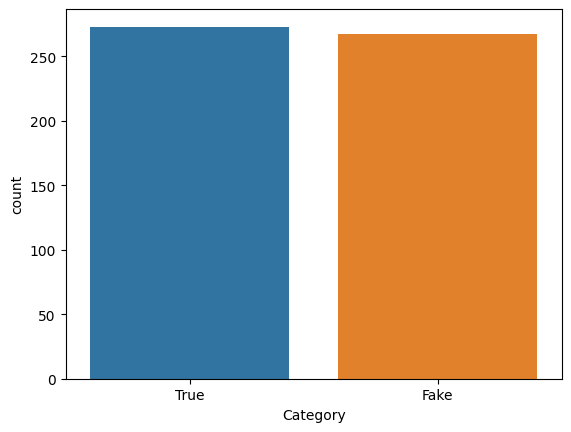

In [38]:
sns.countplot(x= train.Category)
print(train["Category"].value_counts())

In [48]:
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
# nltk.download('stopwords')

In [56]:
train_dataset = tf.data.Dataset.from_tensor_slices((train["Text"], train['tipo']))
val_dataset = tf.data.Dataset.from_tensor_slices((val["Text"], val['tipo']))


In [53]:
for row in train_dataset.take(3):
  print(row)

(<tf.Tensor: shape=(), dtype=string, numpy=b'La inutilidad de tomar tanta agua\nLos expertos recomiendan que tomemos dos litros -ocho vasos- de l\xc3\xadquidos cada d\xc3\xada para tener una salud \xc3\xb3ptima.\nNuestro consumo diario de l\xc3\xadquidos puede incluir bebidas como caf\xc3\xa9, t\xc3\xa9, y jugos adem\xc3\xa1s del agua.\nPero tal como sugiere un nuevo estudio en Australia, esta recomendaci\xc3\xb3n ha sido malinterpretada y creemos, err\xc3\xb3neamente, que debemos tomar espec\xc3\xadficamente agua, ocho vasos de agua.\nNuestros dos litros de l\xc3\xadquidos diarios deben incluir todo el caf\xc3\xa9, t\xc3\xa9, jugos y otras bebidas, afirma el informe publicado en Australian and New Zealand Journal of Public Health (Revista de Salud P\xc3\xbablica de Australia y Nueva Zelanda).\nPorque estamos bebiendo in\xc3\xbatilmente demasiada agua, principalmente agua embotellada, agrega.\nTal como expresa el profesor Spero Tsindos, del Departamento de Diet\xc3\xa9tica y Nutrici\xc

In [54]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b'La inutilidad de tomar tanta agua\nLos expertos recomiendan que tomemos dos litros -ocho vasos- de l\xc3\xadquidos cada d\xc3\xada para tener una salud \xc3\xb3ptima.\nNuestro consumo diario de l\xc3\xadquidos puede incluir bebidas como caf\xc3\xa9, t\xc3\xa9, y jugos adem\xc3\xa1s del agua.\nPero tal como sugiere un nuevo estudio en Australia, esta recomendaci\xc3\xb3n ha sido malinterpretada y creemos, err\xc3\xb3neamente, que debemos tomar espec\xc3\xadficamente agua, ocho vasos de agua.\nNuestros dos litros de l\xc3\xadquidos diarios deben incluir todo el caf\xc3\xa9, t\xc3\xa9, jugos y otras bebidas, afirma el informe publicado en Australian and New Zealand Journal of Public Health (Revista de Salud P\xc3\xbablica de Australia y Nueva Zelanda).\nPorque estamos bebiendo in\xc3\xbatilmente demasiada agua, principalmente agua embotellada, agrega.\nTal como expresa el profesor Spero Tsindos, del Departamento de Diet\xc3\xa9tica y Nutrici\xc3\xb3n Humana de la Universidad de L

In [57]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [58]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [59]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [60]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'se',
       'del', 'number', 'por', 'un', 'con', 'las', 'para', 'una', 'no'],
      dtype='<U15')

In [61]:
encoder("Hola a todos").numpy()

array([ 1,  8, 58])

In [62]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])